In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# check for each attribute the number of unknown values

for column in df.columns:
    i = 0
    for row in df[column]:
        if row == "unknown":
            i += 1

    print(column + ": " + str(i))

age: 0
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0
y: 0


<AxesSubplot:title={'center':'total yes'}>

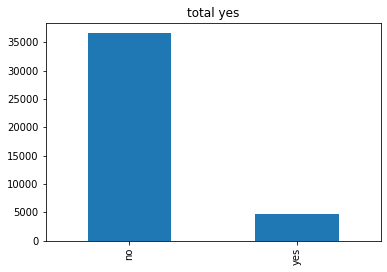

In [17]:
y_df = df["y"]
count = y_df.value_counts()
count.plot.bar(title = "total yes")

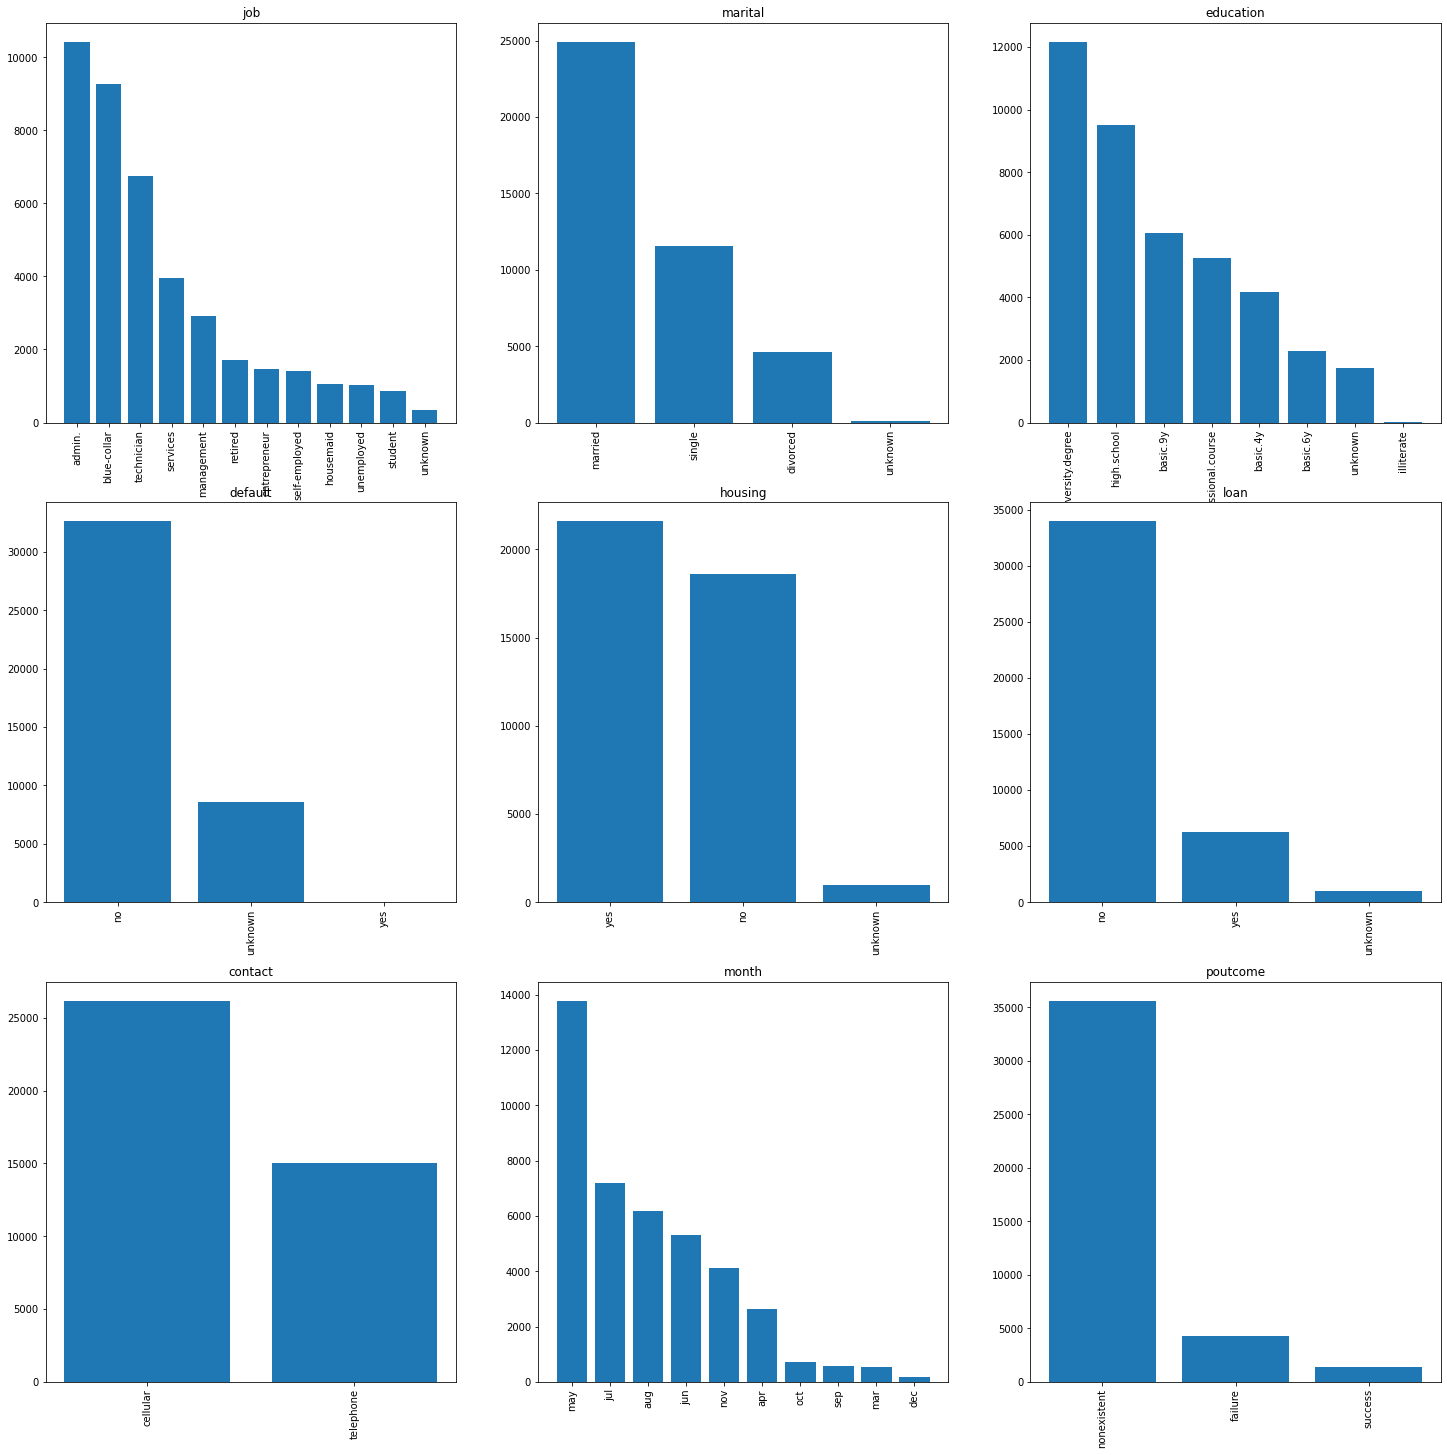

In [39]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, ax = plt.subplots(3, 3, figsize=(25, 25))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    ax[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    ax[trace_x, trace_y].set_title(cat_column)

    for tick in ax[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

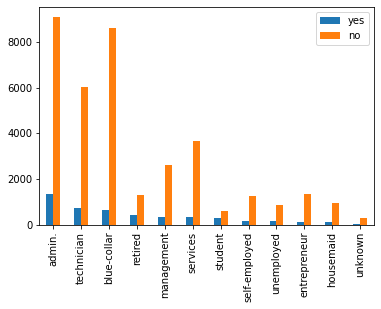

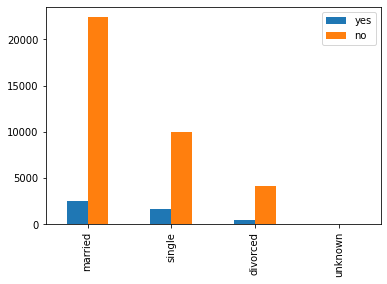

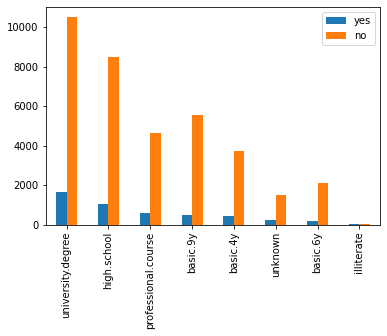

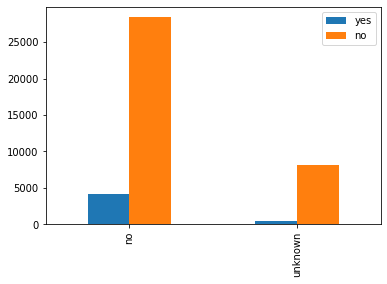

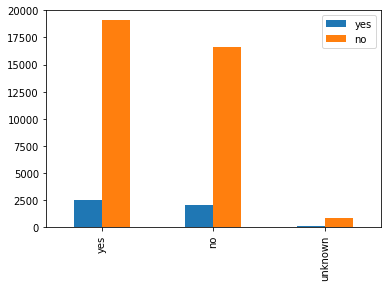

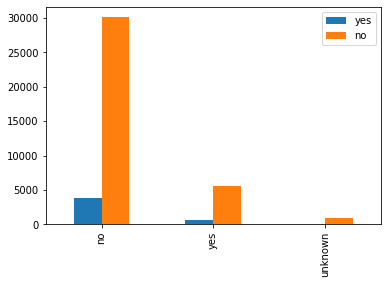

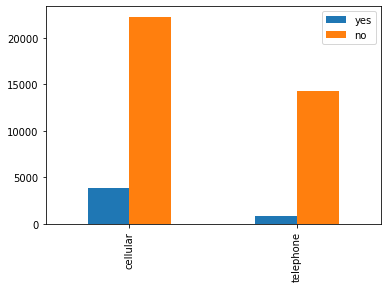

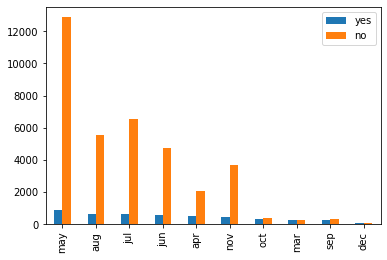

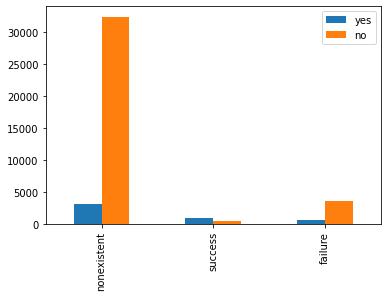

In [49]:
for cat_column in cat_columns:
    j_df = pd.DataFrame()
    j_df['yes'] = df[df['y'] == 'yes'][cat_column].value_counts()
    j_df['no'] = df[df['y'] == 'no'][cat_column].value_counts()

    j_df.plot.bar()